#Previsão de Custos de Planos de Saúde com Machine Learning

Este trabalho tem como objetivo desenvolver um modelo de machine learning capaz de prever os custos de planos de saúde com base em características dos clientes. Através da aplicação de técnicas de regressão e análise de dados buscamos identificar padrões que influenciam os valores cobrados, contribuindo para uma melhor compreensão e estimativa dos preços praticados no setor de saúde.

### Iremos utilizar uma base de dados que encontramos no site [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance) que dispõe sobre dados de planos de sáude.

### Dicionário:

* Age: A idade da pessoa segurada.
* Sex: Gênero (masculino ou feminino) da pessoa segurada.
* BMI (Body Mass Index): Uma medida de gordura corporal baseada na altura e no peso.
* Children: O número de dependentes cobertos.
* Smoker: Se a pessoa segurada é fumante (sim ou não).
* Region: A área geográfica de cobertura.
* Charges: Os custos de seguro médico incorridos pela pessoa segurada.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Healthcare Insurance.csv')

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

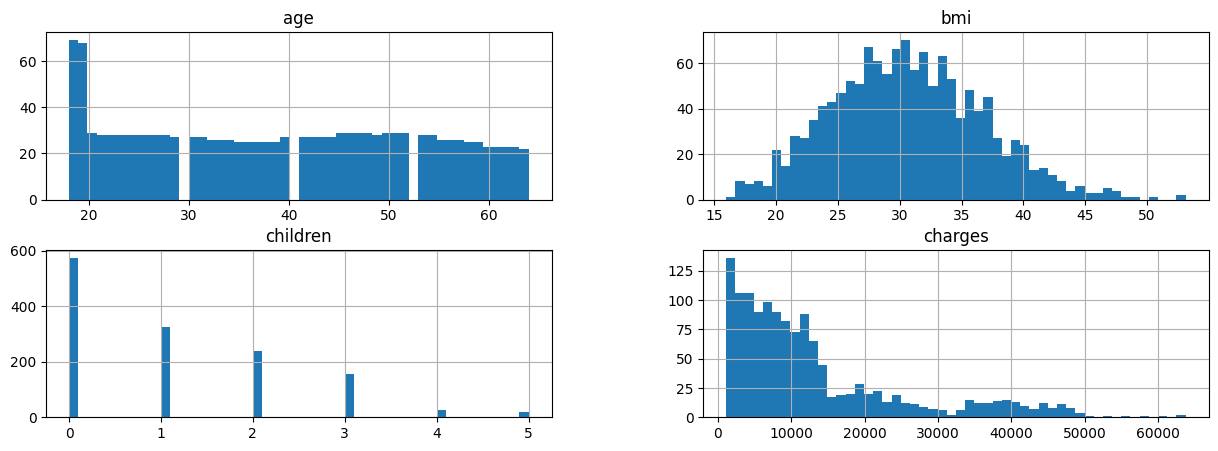

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 5))

###Análise da correlação entre BMI e Charges

A coluna BMI (Body Mass Index), em português IMC (Índice de Massa Corporal), representa uma medida utilizada para avaliar se um indivíduo está com o peso adequado em relação à sua altura. Considerando que pessoas com sobrepeso ou obesidade estão mais propensas a desenvolver doenças, como hipertensão arterial, o que pode levá-las a procurar assistência médica com maior frequência ou contratar planos de saúde mais abrangentes, decidimos analisar a **correlação entre as colunas BMI e Charges** do dataset.

O resultado obtido no cálculo foi de aproximadamente 0.20, o que indica uma **correlação positiva fraca**. Isso significa que a coluna BMI, por si só, não exerce uma influência significativa sobre os valores cobrados pelos planos de saúde.

Correlação entre BMI e charges: 0.19834096883362895


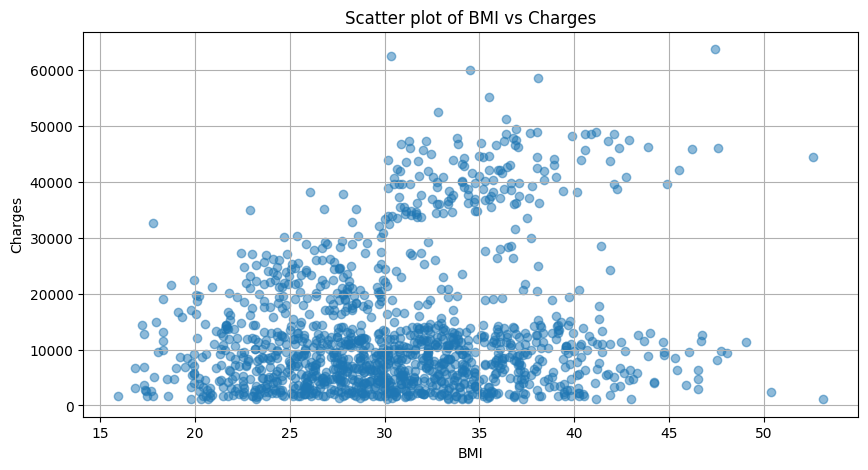

In [ ]:
correlation = df['bmi'].corr(df['charges'])
print("Correlação entre BMI e charges:", correlation)

plt.figure(figsize=(10, 5))
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('Scatter plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

### Análise de correlação entre BMI, Charges e Smokers

Ao segmentar os dados de acordo com o hábito de fumar, observamos comportamentos bastante distintos. **Entre os fumantes, a correlação entre BMI e charges foi de aproximadamente 0,81, indicando uma relação forte e positiva: quanto maior o IMC, maior tende a ser o custo do plano de saúde. Já entre os não fumantes, a correlação foi de apenas 0,08, considerada praticamente nula**.

Isso sugere que o IMC exerce um impacto mais relevante sobre o custo dos planos de saúde quando combinado com o hábito de fumar, provavelmente devido ao aumento dos riscos associados a doenças respiratórias. Já entre não fumantes, a correlação se mantém fraca, reforçando que o BMI, isoladamente, não é um bom preditor de custos.

Correlação (BMI x charges x fumantes): 0.81
Correlação (BMI x charges x não fumantes): 0.08


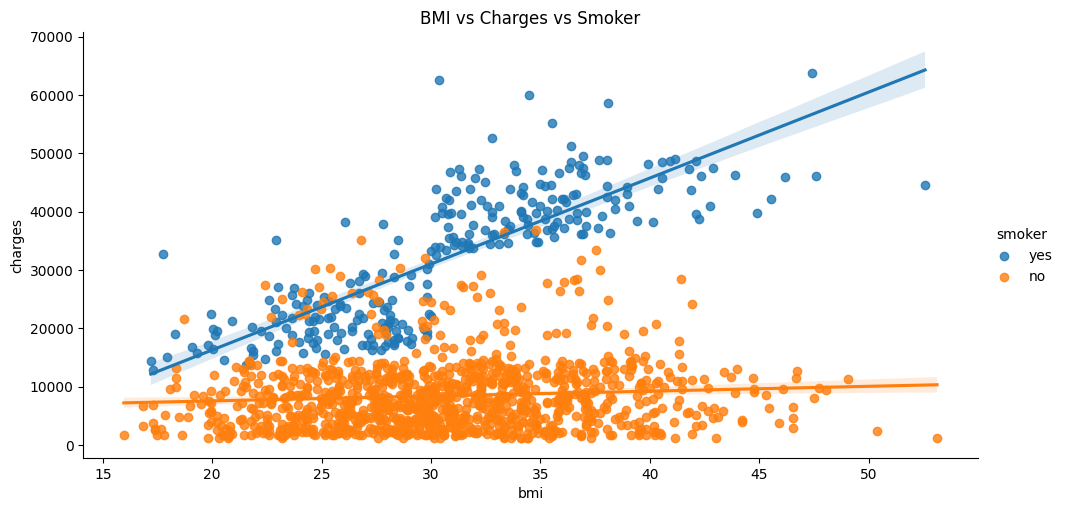

In [ ]:
# Correlação entre BMI e Charges para fumantes
corr_smokers = df[df['smoker'] == 'yes']['bmi'].corr(df[df['smoker'] == 'yes']['charges'])

# Correlação entre BMI e Charges para não fumantes
corr_notsmokers = df[df['smoker'] == 'no']['bmi'].corr(df[df['smoker'] == 'no']['charges'])

print(f"Correlação (BMI x charges x fumantes): {corr_smokers:.2f}")
print(f"Correlação (BMI x charges x não fumantes): {corr_notsmokers:.2f}")

sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', aspect=2)
plt.title('BMI vs Charges vs Smoker')
plt.show()

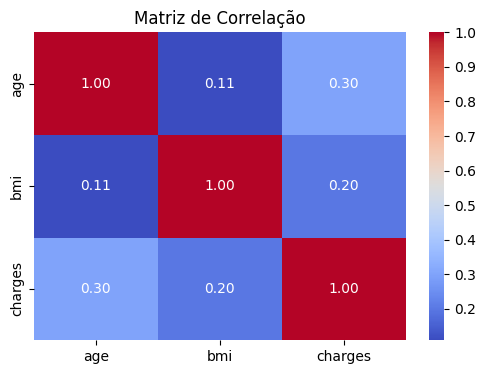

In [ ]:
import seaborn as sns

dados = df[['age', 'bmi', 'charges']]

# Calcula a matriz de correlação
correlacao = dados.corr()

# Exibe como heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

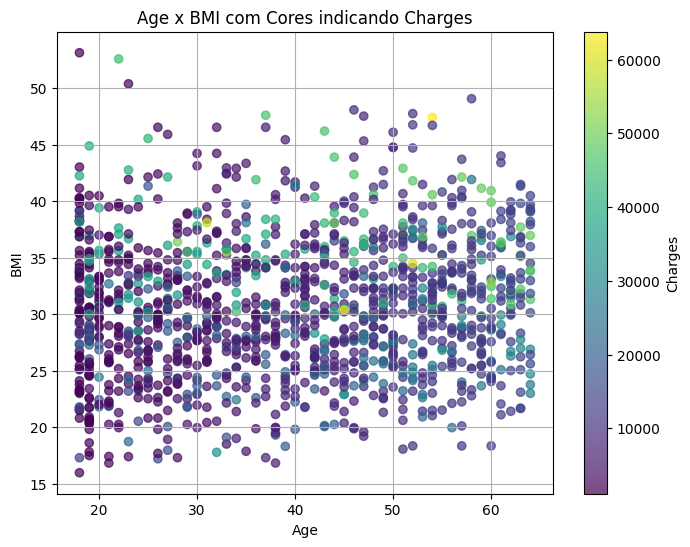

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['bmi'], c=df['charges'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age x BMI com Cores indicando Charges')
plt.colorbar(label='Charges')
plt.grid(True)
plt.show()

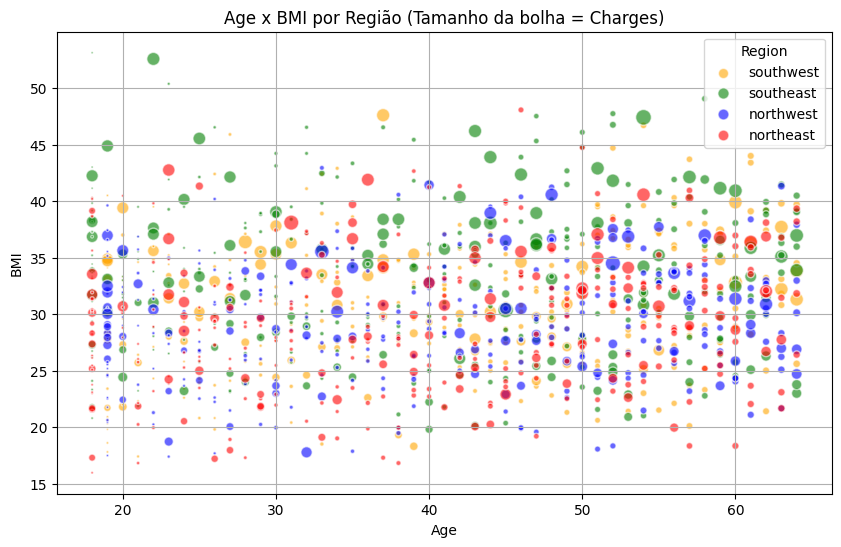

In [ ]:
import matplotlib.pyplot as plt

cores = {
    'northeast': 'red',
    'northwest': 'blue',
    'southeast': 'green',
    'southwest': 'orange'
}

plt.figure(figsize=(10, 6))

for regiao in df['region'].unique():
    dados_regiao = df[df['region'] == regiao]
    plt.scatter(
        dados_regiao['age'],
        dados_regiao['bmi'],
        s=dados_regiao['charges'] / 500,  # escala para tamanho das bolhas
        color=cores.get(regiao, 'gray'),
        label=regiao,
        alpha=0.6,
        edgecolors='w'
    )

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age x BMI por Região (Tamanho da bolha = Charges)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


----

# Análise estatística

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Idade

- Percebemos que se trata de uma base de dados de adultos economicamente ativos (idade de 18 à 64 anos).

- Na idade, a média é de 39.2 anos, com desvio padrão de 14.05, indicando uma distribuição relativamente bem espalhada, mas sem sinais de outliers, já que a diferença entre os quartis está dentro de uma variação natural para uma idade.

## Custos

- Aqui temos uma amplitude bem elevada de **1121.87** até **63770.42**.

- A mediana é de **9382.03**, enquanto o terceiro quartil é **16639.91**, e o máximo dispara para **63770.42**.

- Isso indica que aproximadamente **25% dos registros possuem um valor maior do que 16639.91**, o que demonstra uma distribuição assimétrica, onde poucos registros possuem uma despesa muito elevada.

<ipython-input-113-2a2471c66bd8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="charges", data=df, palette="hls")


<Axes: xlabel='charges'>

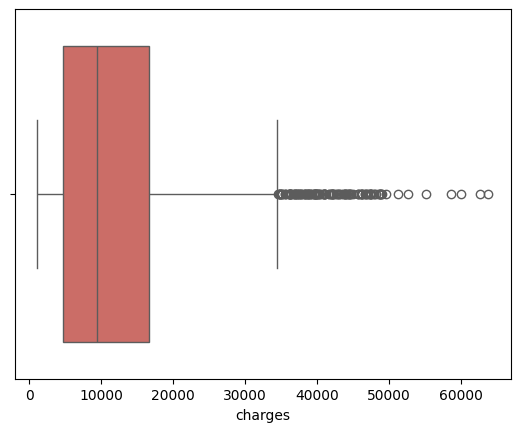

In [ ]:
sns.boxplot(x="charges", data=df, palette="hls")

----

# Tratamento dos dados

In [ ]:
df.shape

(1338, 7)

Verificando as informações do dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Removendo campos nulos para não afetar o modelo.

Pode-se observar que o dataframe não contém valores nulos no momento. No entanto, o comando de remoção foi mantido como uma medida preventiva, caso o conjunto de dados venha a ser atualizado ou reutilizado futuramente.

Consequências de não tratar valores ausentes:
*   Erros de execução: Muitos algoritmos não aceitam *NaN* e falham ao treinar.
*   Queda na acurácia: O modelo aprende padrões errados ou incompletos.
*   Previsões imprecisas: Falta de informação afeta decisões do modelo.
*   Introdução de viés: Dados ausentes em subgrupos específicos causam injustiças.
*   Inferência instável: Modelos em produção podem falhar com dados incompletos.
*   Análises distorcidas: Estatísticas e visualizações se tornam enganosas.


In [ ]:
df.dropna(inplace=True)
df.shape

(1338, 7)

Observa-se, ao executar o comando acima, que a quantidade de linhas não foi alterada, indicando que nenhum valor nulo foi encontrado ou removido da base de dados.

O próximo passo é verificar e remover dados duplicados. Essa etapa é importante para evitar viés no modelo, além de reduzir o uso desnecessário de recursos computacionais, como tempo de processamento e memória.

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

O resultado da verificação indica que não há linhas duplicadas no dataframe. Ainda assim, o comando de remoção foi mantido como uma medida preventiva, garantindo que registros redundantes sejam eliminados caso o conjunto de dados seja atualizado ou modificado futuramente.

## Aplicando Encoder nas colunas categóricas

In [ ]:
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_region = encoder.fit_transform(df[['region']])

encoded_cols = encoder.get_feature_names_out(["region"])

df_encoded = pd.DataFrame(encoded_region, columns=encoded_cols, index=df.index)

df_after_encoding = pd.concat([df.drop('region', axis=1), df_encoded], axis=1)

In [ ]:
df_after_encoding.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
set(df['sex'])

{'female', 'male'}

In [ ]:
set(df['smoker'])

{'no', 'yes'}

Como são dados binários, podemos aplicar o LabelEncoder para que substitua a mesma coluna por 0 e 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
colunas = ['sex', 'smoker']

for coluna in colunas:
    df_after_encoding[coluna] = encoder.fit_transform(df_after_encoding[coluna])
df_after_encoding.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


O BMI (IMC em português) é uma medida simples que relaciona o peso e a altura de uma pessoa. Utilizado como uma forma rápida e prática de avaliar se uma pessoa está abaixo do peso, com peso adequado ou com excesso de peso/obesidade. A imagem abaixo define faixas de IMC que ajudam a identificar riscos à saúde relacionados ao peso.

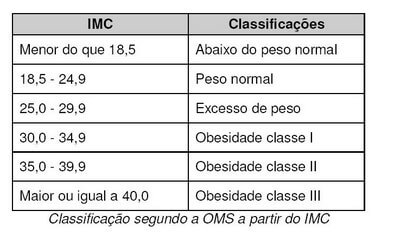

Então esse é um dado que pode ser categorizado tornando-o mais interpretável e eficiente ao trabalhar com categorias em vez de valores contínuos.

In [ ]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = [
    'Underweight',
    'Normal weight',
    'Overweight',
    'Obesity Class I',
    'Obesity Class II',
    'Obesity Class III'
]

df_after_encoding['bmi_category'] = pd.cut(
    df['bmi'],
    bins=bins,
    labels=bmi_labels,
    include_lowest=True
  )
df_after_encoding = df_after_encoding.drop('bmi', axis=1)

In [ ]:
df_after_encoding.head()

,age,sex,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,0,1,16884.92400,0.0,0.0,0.0,1.0,Overweight
1,18,1,1,0,1725.55230,0.0,0.0,1.0,0.0,Obesity Class I
2,28,1,3,0,4449.46200,0.0,0.0,1.0,0.0,Obesity Class I
3,33,1,0,0,21984.47061,0.0,1.0,0.0,0.0,Normal weight
4,32,1,0,0,3866.85520,0.0,1.0,0.0,0.0,Overweight


Por se tratar de nível de obesidade, decidimos utilizar o **OrdinalEncoder** que categoriza de forma crescente (o modelo pode entender por nível de importância).

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[bmi_labels])
df_after_encoding[['bmi_category']] = encoder.fit_transform(df_after_encoding[['bmi_category']])

df_after_encoding.head()

,age,sex,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,0,1,16884.92400,0.0,0.0,0.0,1.0,2.0
1,18,1,1,0,1725.55230,0.0,0.0,1.0,0.0,3.0
2,28,1,3,0,4449.46200,0.0,0.0,1.0,0.0,3.0
3,33,1,0,0,21984.47061,0.0,1.0,0.0,0.0,1.0
4,32,1,0,0,3866.85520,0.0,1.0,0.0,0.0,2.0


Conforme préviamente dito na Análise de estatística, decidimos utilizar o **MinMaxScaler** para a idade (que atua em uma escala entre 0 e 1). Já que são dados que seguem parcialmente uma distribuição que resulta em ausência de outiliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_after_encoding[['age']] = min_max_scaler.fit_transform(df_after_encoding[['age']])

Já para custo, aplicamos o **StarndarScaler** que atua em centralizar na média 0 e desvio padrão 1.

In [ ]:
from sklearn.preprocessing import StandardScaler


standard_scaler = StandardScaler()
df_after_encoding[['charges']] = standard_scaler.fit_transform(df_after_encoding[['charges']])

df_after_encoding.head()

,age,sex,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,0.021739,0,0,1,0.297857,0.0,0.0,0.0,1.0,2.0
1,0.000000,1,1,0,-0.954381,0.0,0.0,1.0,0.0,3.0
2,0.217391,1,3,0,-0.729373,0.0,0.0,1.0,0.0,3.0
3,0.326087,1,0,0,0.719104,0.0,1.0,0.0,0.0,1.0
4,0.304348,1,0,0,-0.777499,0.0,1.0,0.0,0.0,2.0


----

# Separar base de treino e de teste e treinar com modelos

In [ ]:
coluna_alvo = 'charges'

X = df_after_encoding.drop(coluna_alvo, axis=1)
y = df_after_encoding[coluna_alvo]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=3)
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{nome} - MSE: {mse:.2f}, R²: {(r2 * 100):.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Linear Regression - MSE: 0.24, R²: 80.58, MAE: 0.35, RMSE: 0.49
Decision Tree - MSE: 0.28, R²: 78.05, MAE: 0.26, RMSE: 0.52
Random Forest - MSE: 0.16, R²: 87.51, MAE: 0.22, RMSE: 0.40
Gradient Boosting - MSE: 0.13, R²: 89.88, MAE: 0.21, RMSE: 0.36
HistGradientBoostingRegressor - MSE: 0.15, R²: 88.43, MAE: 0.23, RMSE: 0.38
KNeighborsRegressor - MSE: 0.38, R²: 69.90, MAE: 0.37, RMSE: 0.61


Mean Squared Error (Erro Quadrático Médio): Quanto menor, melhor. Um MSE de 0.13 indica que, em média, o modelo está errando pouco — e que não há muitos erros graves.

Coeficiente de Determinação: Um R² de 89.89% significa que o modelo explica quase 90% da variação no custo dos planos de saúde — um ótimo desempenho.

Mean Absolute Error (Erro Absoluto Médio): Um MAE de 0.21 indica que o modelo erra, em média, cerca de 0.21 unidades monetárias (ou outra medida usada no dataset) por previsão — é um erro baixo.

Root Mean Squared Error (Raiz do Erro Quadrático Médio): Um RMSE de 0.36 indica que o erro típico do modelo nas previsões é de 0.36 unidades. Como ele é derivado do MSE, é sensível a grandes desvios.